In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../Lab 1/AIDS_Classification.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


# Explanatory data analysis

1) Завантажити дані, вивести назви колонок і розмір датасета

In [4]:
column_names = df.columns
print(column_names)
print('Shape of dataset:', np.shape(df))

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')
Shape of dataset: (2139, 23)


2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [5]:
df = df.dropna()
df.shape

(2139, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [7]:
df.dtypes.value_counts()

int64      22
float64     1
dtype: int64

3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

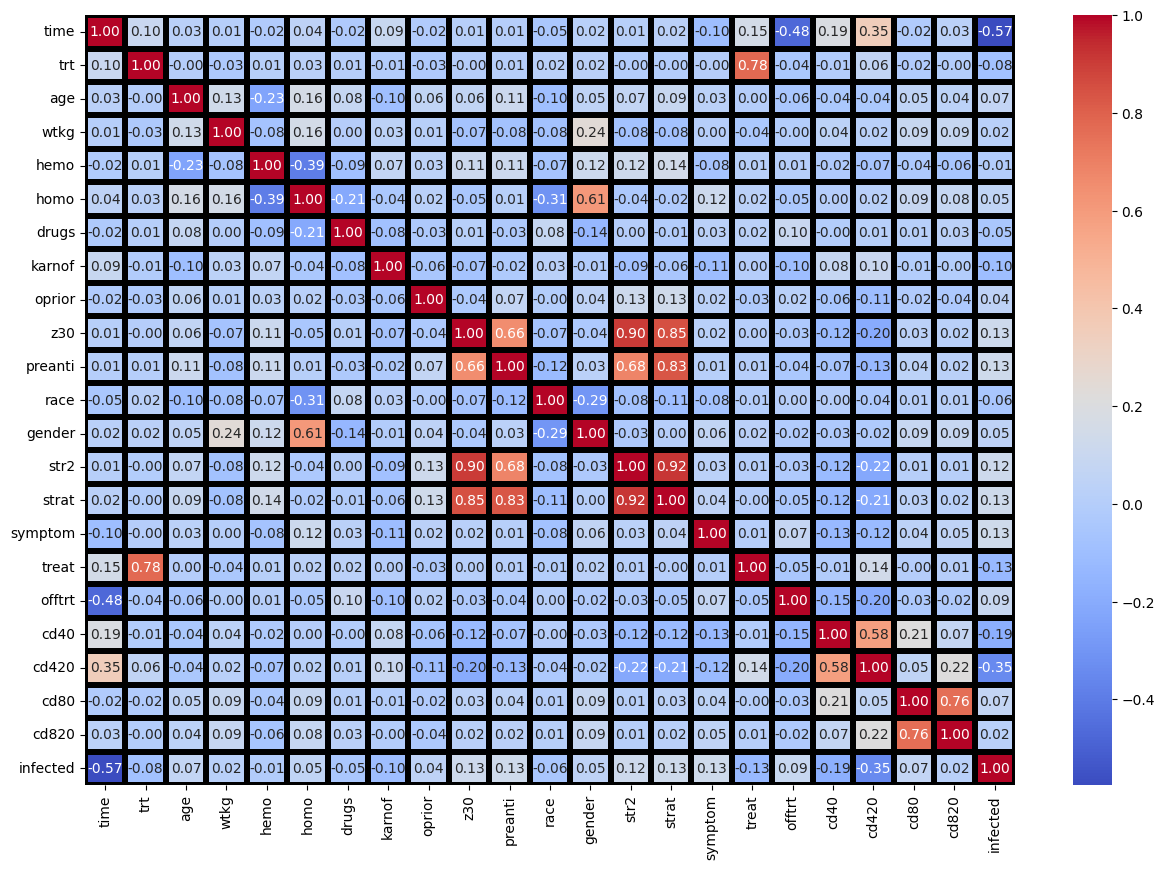

In [8]:
Corr_matrix = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(Corr_matrix, annot = True, cmap = 'coolwarm', fmt ='.2f', linewidths = 3, linecolor='black'  )
plt.show()

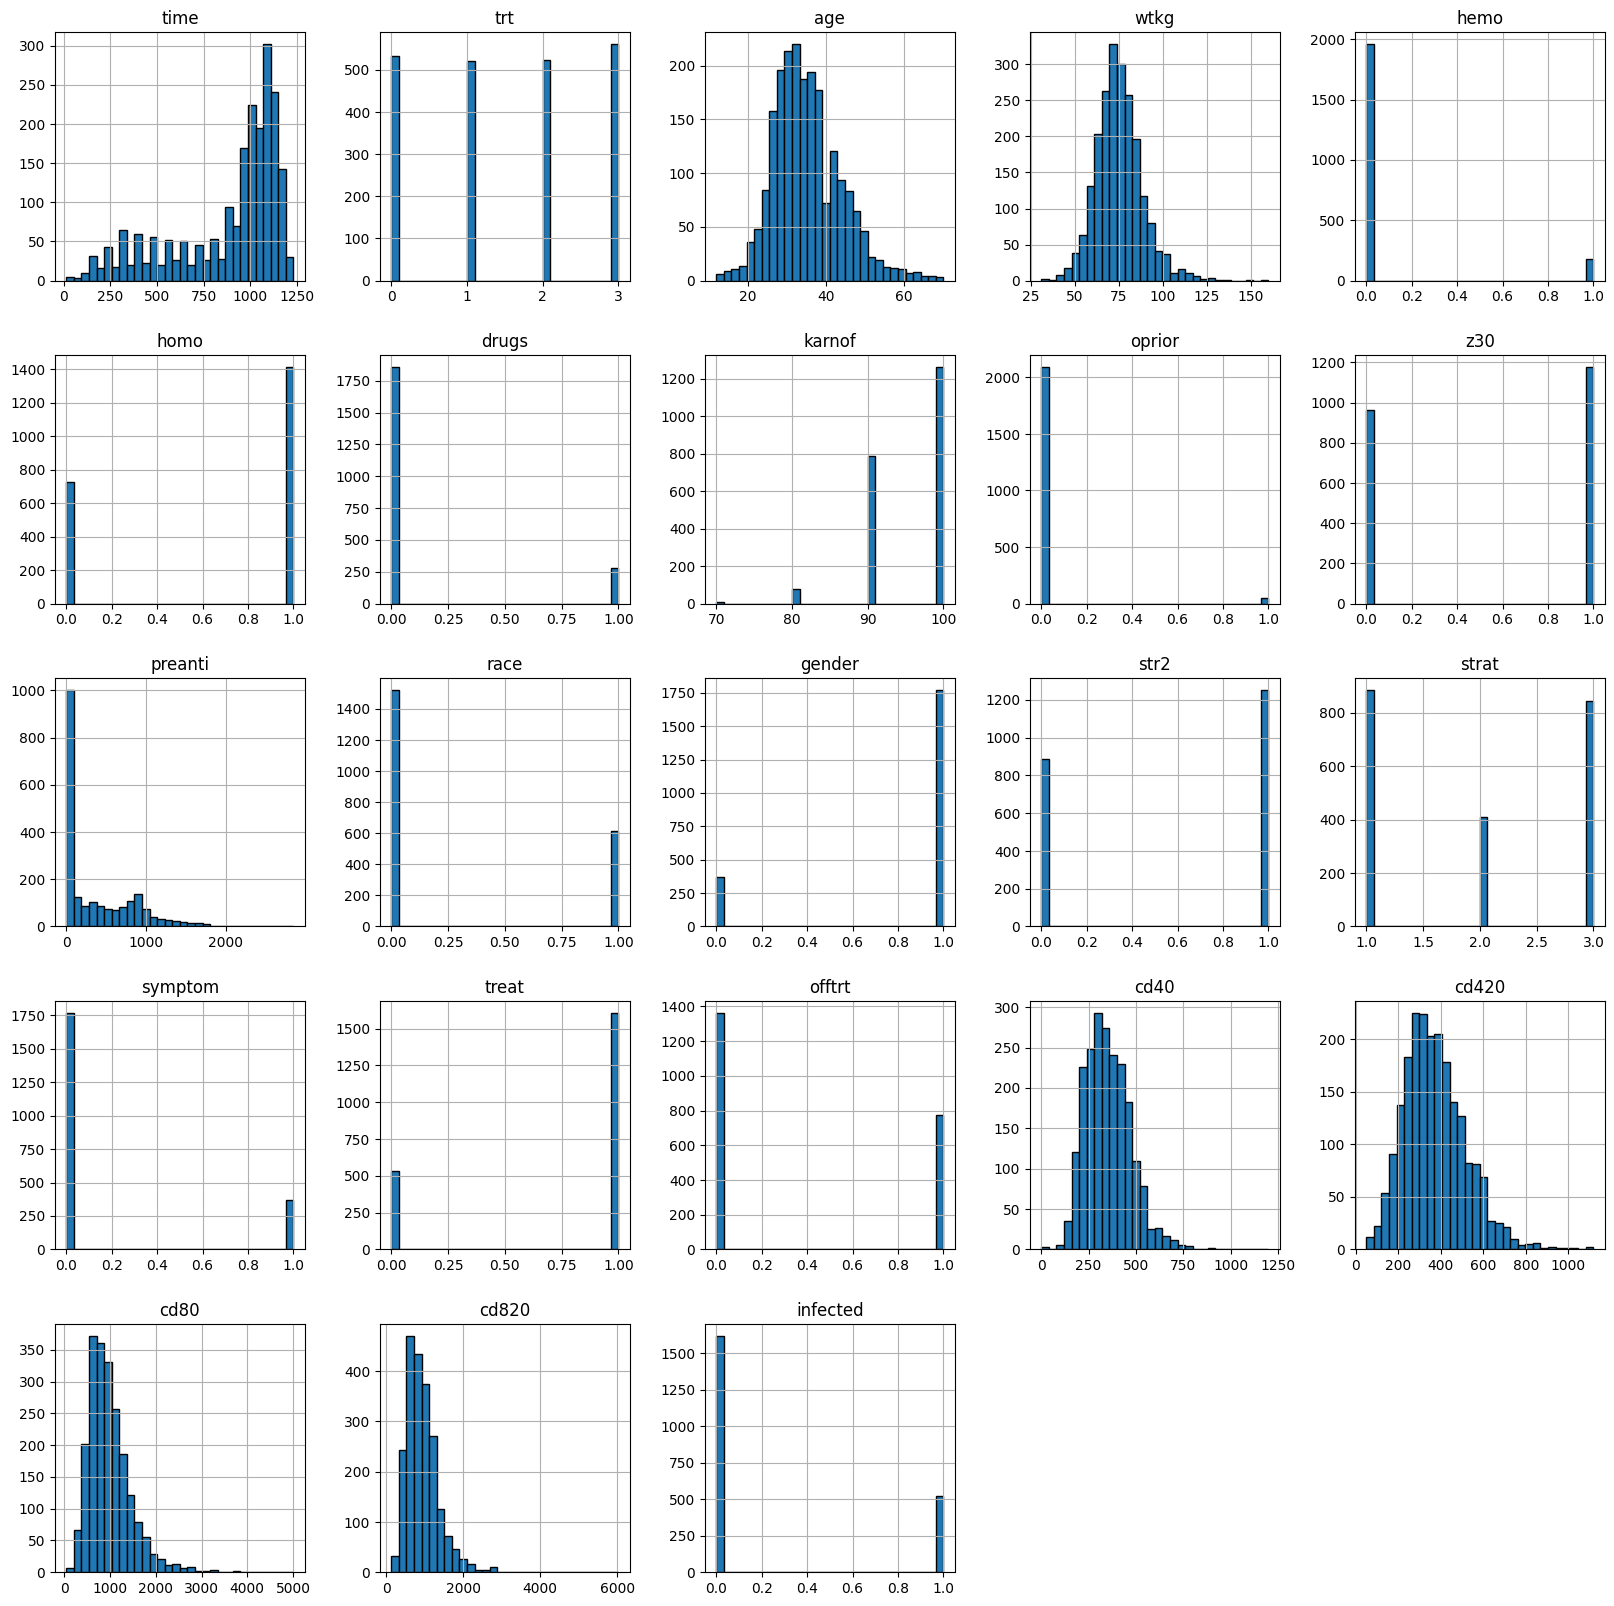

In [9]:
df.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.show()

In [10]:
features = [col for col in df.columns if col != 'infected']
print(features)

['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820']


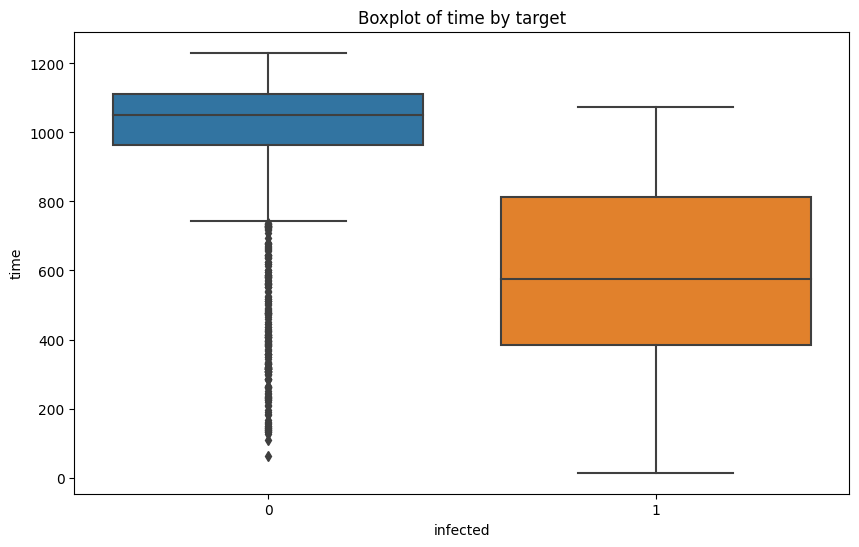

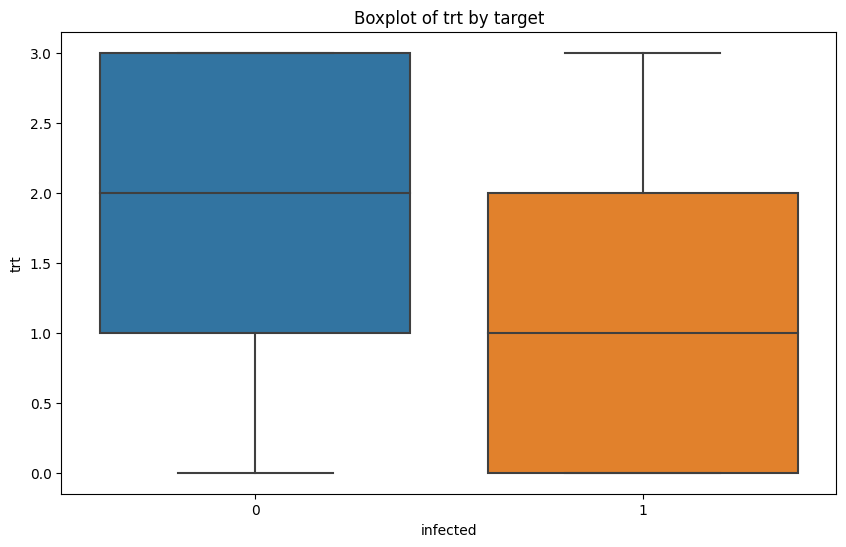

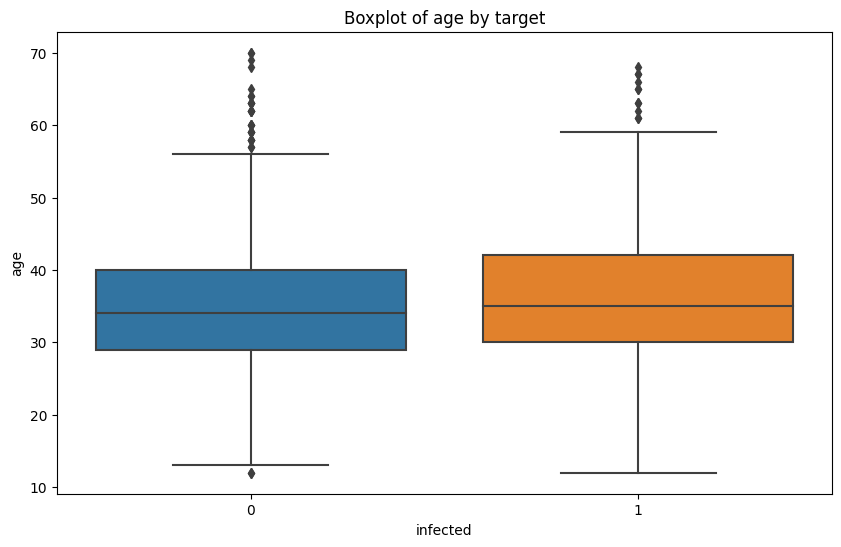

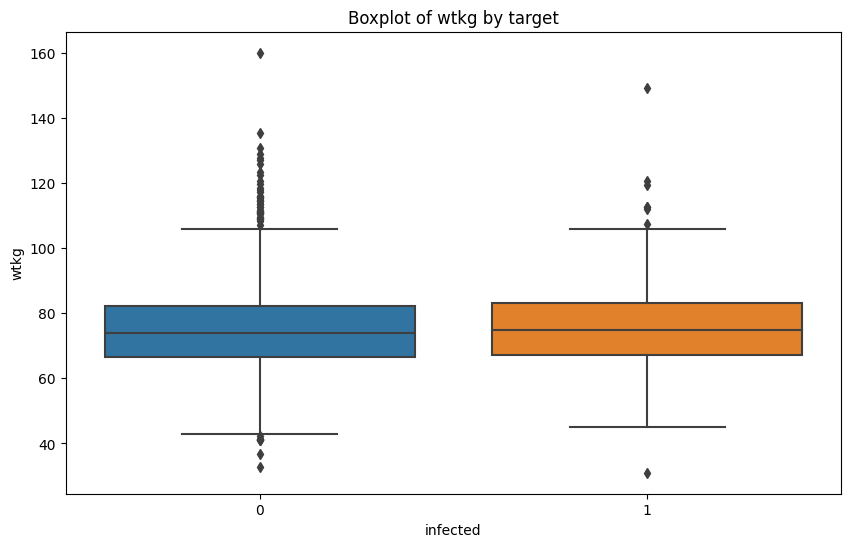

In [11]:
for feature in features[:4]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='infected', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by target')
    plt.show()

0    1618
1     521
Name: infected, dtype: int64


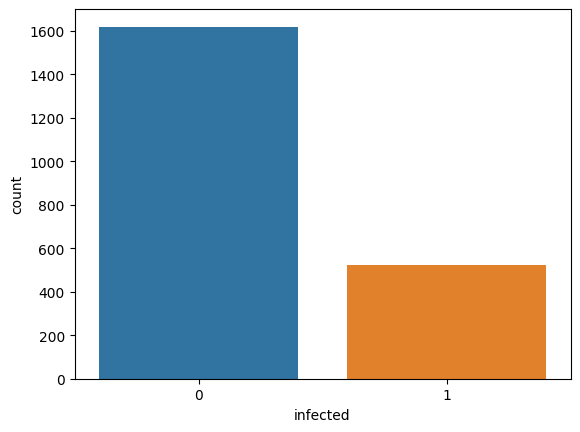

In [12]:
print(df['infected'].value_counts())


sns.countplot(x='infected', data=df)
plt.show()

4) Нормалізувати дані

In [13]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['infected'])
y = df['infected']
X = np.array(X)
y = np.array(y)
for i in range(0, 3):
    print(X[i, :])
print(y)

[948.       2.      48.      89.8128   0.       0.       0.     100.
   0.       0.       0.       0.       0.       0.       1.       0.
   1.       0.     422.     477.     566.     324.    ]
[1.00200e+03 3.00000e+00 6.10000e+01 4.94424e+01 0.00000e+00 0.00000e+00
 0.00000e+00 9.00000e+01 0.00000e+00 1.00000e+00 8.95000e+02 0.00000e+00
 0.00000e+00 1.00000e+00 3.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
 1.62000e+02 2.18000e+02 3.92000e+02 5.64000e+02]
[9.6100e+02 3.0000e+00 4.5000e+01 8.8452e+01 0.0000e+00 1.0000e+00
 1.0000e+00 9.0000e+01 0.0000e+00 1.0000e+00 7.0700e+02 0.0000e+00
 1.0000e+00 1.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 3.2600e+02 2.7400e+02 2.0630e+03 1.8930e+03]
[0 1 0 ... 0 1 0]


In [14]:
object = StandardScaler()
X = object.fit_transform(X)
for i in range(0, 3):
    print(X[i, :])

[ 0.2357988   0.42496     1.46454203  1.10764852 -0.3031231  -1.39654747
 -0.38889316  0.77183636 -0.14988842 -1.10611605 -0.80925714 -0.6367006
 -2.1937411  -1.18921033 -1.09017691 -0.45733764  0.57537088 -0.75454116
  0.60313081  0.73092701 -0.87615103 -1.37425994]
[ 0.42059994  1.31177897  2.95759528 -1.93686183 -0.3031231  -1.39654747
 -0.38889316 -0.92319237 -0.14988842  0.90406427  1.1008995  -0.6367006
 -2.1937411   0.84089414  1.13490745 -0.45733764  0.57537088 -0.75454116
 -1.590108   -1.06020741 -1.23858648 -0.83477895]
[ 0.28028796  1.31177897  1.11999128  1.00502457 -0.3031231   0.71605157
  2.57140033 -0.92319237 -0.14988842  0.90406427  0.69965989 -0.6367006
  0.45584231  0.84089414  1.13490745 -0.45733764  0.57537088  1.32530876
 -0.20668044 -0.6729351   2.24204361  2.15259704]


5) Провести навчання наступних класифікаторів:
- kNN
- дерево ухвалення рішень
- SVM
- Random Forest
- AdaBoost
6) Підібрати оптимальні параметри
-  для kNN
-  для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»
7) Серед обраних оптимальних моделей кожного класу вибрати найкращу.
- Відобразити
sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix


# Split X and y on train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 40)

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X_train, y_train)
y_hat = neigh_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       846
           1       0.47      0.55      0.51       224

    accuracy                           0.78      1070
   macro avg       0.67      0.69      0.68      1070
weighted avg       0.79      0.78      0.78      1070

[[709 137]
 [101 123]]


In [18]:
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train, y_train)
y_hat = neigh_3.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       901
           1       0.42      0.65      0.51       169

    accuracy                           0.80      1070
   macro avg       0.68      0.74      0.70      1070
weighted avg       0.85      0.80      0.82      1070

[[751 150]
 [ 59 110]]


In [19]:
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train, y_train)
y_hat = neigh_5.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       936
           1       0.35      0.68      0.46       134

    accuracy                           0.80      1070
   macro avg       0.65      0.75      0.67      1070
weighted avg       0.87      0.80      0.83      1070

[[767 169]
 [ 43  91]]


In [20]:
neigh_50 = KNeighborsClassifier(n_neighbors=50)
neigh_50.fit(X_train, y_train)
y_hat = neigh_50.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1017
           1       0.15      0.74      0.25        53

    accuracy                           0.78      1070
   macro avg       0.57      0.76      0.56      1070
weighted avg       0.94      0.78      0.84      1070

[[796 221]
 [ 14  39]]


In [21]:
neigh_250 = KNeighborsClassifier(n_neighbors=250)
neigh_250.fit(X_train, y_train)
y_hat = neigh_250.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1070
           1       0.00      0.00      0.00         0

    accuracy                           0.76      1070
   macro avg       0.50      0.38      0.43      1070
weighted avg       1.00      0.76      0.86      1070

[[810 260]
 [  0   0]]


C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWa

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
DeTree_1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1,)
DeTree_1.fit(X_train, y_train)
y_hat = DeTree_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       874
           1       0.65      0.86      0.74       196

    accuracy                           0.89      1070
   macro avg       0.81      0.88      0.84      1070
weighted avg       0.91      0.89      0.90      1070

[[783  91]
 [ 27 169]]


In [37]:
from sklearn.tree import DecisionTreeClassifier
DeTree_1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1,)
DeTree_1.fit(X_train, y_train)
y_hat = DeTree_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       877
           1       0.64      0.87      0.74       193

    accuracy                           0.89      1070
   macro avg       0.81      0.88      0.83      1070
weighted avg       0.91      0.89      0.89      1070

[[784  93]
 [ 26 167]]


In [38]:
DeTree_1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,)
DeTree_1.fit(X_train, y_train)
y_hat = DeTree_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       813
           1       0.72      0.72      0.72       257

    accuracy                           0.86      1070
   macro avg       0.81      0.82      0.82      1070
weighted avg       0.87      0.86      0.86      1070

[[739  74]
 [ 71 186]]


In [39]:
DeTree_1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,)
DeTree_1.fit(X_train, y_train)
y_hat = DeTree_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       818
           1       0.69      0.71      0.70       252

    accuracy                           0.86      1070
   macro avg       0.80      0.81      0.80      1070
weighted avg       0.86      0.86      0.86      1070

[[738  80]
 [ 72 180]]


# SVM

In [23]:
from sklearn.svm import SVC
SVC_1 = SVC(kernel='linear')
SVC_1.fit(X_train, y_train)
y_hat = SVC_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       843
           1       0.66      0.75      0.70       227

    accuracy                           0.86      1070
   macro avg       0.79      0.82      0.81      1070
weighted avg       0.87      0.86      0.87      1070

[[754  89]
 [ 56 171]]


In [24]:
SVC_1 = SVC(C=0.1, kernel='linear')
SVC_1.fit(X_train, y_train)
y_hat = SVC_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       856
           1       0.62      0.75      0.68       214

    accuracy                           0.86      1070
   macro avg       0.77      0.82      0.79      1070
weighted avg       0.87      0.86      0.86      1070

[[756 100]
 [ 54 160]]


In [25]:
SVC_rbf = SVC(C=0.1, kernel='rbf', gamma=0.1)
SVC_rbf.fit(X_train, y_train)
y_hat = SVC_rbf.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1070
           1       0.00      0.00      0.00         0

    accuracy                           0.76      1070
   macro avg       0.50      0.38      0.43      1070
weighted avg       1.00      0.76      0.86      1070

[[810 260]
 [  0   0]]


C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWa

In [26]:
SVC_rbf = SVC(C=100, kernel='rbf', gamma=10)
SVC_rbf.fit(X_train, y_train)
y_hat = SVC_rbf.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1070
           1       0.00      0.00      0.00         0

    accuracy                           0.76      1070
   macro avg       0.50      0.38      0.43      1070
weighted avg       1.00      0.76      0.86      1070

[[810 260]
 [  0   0]]


C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWa

In [27]:
SVC_poly = SVC(C=100, kernel='poly', degree=10)
SVC_poly.fit(X_train, y_train)
y_hat = SVC_poly.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       942
           1       0.28      0.58      0.38       128

    accuracy                           0.78      1070
   macro avg       0.61      0.69      0.62      1070
weighted avg       0.86      0.78      0.81      1070

[[756 186]
 [ 54  74]]


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
Randforest_1 = RandomForestClassifier(n_estimators=100, criterion='gini')
Randforest_1.fit(X_train, y_train)
y_hat = Randforest_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       834
           1       0.75      0.83      0.79       236

    accuracy                           0.90      1070
   macro avg       0.85      0.87      0.86      1070
weighted avg       0.91      0.90      0.90      1070

[[769  65]
 [ 41 195]]


In [29]:
Randforest_2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
Randforest_2.fit(X_train, y_train)
y_hat = Randforest_2.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       834
           1       0.74      0.82      0.78       236

    accuracy                           0.90      1070
   macro avg       0.84      0.87      0.86      1070
weighted avg       0.90      0.90      0.90      1070

[[767  67]
 [ 43 193]]


# Adaboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
Adam_1 = AdaBoostClassifier(n_estimators=100, learning_rate=0.01)
Adam_1.fit(X_train, y_train)
y_hat = Adam_1.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       727
           1       0.81      0.62      0.70       343

    accuracy                           0.83      1070
   macro avg       0.82      0.77      0.79      1070
weighted avg       0.83      0.83      0.82      1070

[[678  49]
 [132 211]]


In [31]:
Adam_2 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
Adam_2.fit(X_train, y_train)
y_hat = Adam_2.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       819
           1       0.77      0.79      0.78       251

    accuracy                           0.89      1070
   macro avg       0.85      0.86      0.85      1070
weighted avg       0.90      0.89      0.90      1070

[[758  61]
 [ 52 199]]


In [32]:
Adam_3 = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
Adam_3.fit(X_train, y_train)
y_hat = Adam_3.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       817
           1       0.75      0.77      0.76       253

    accuracy                           0.88      1070
   macro avg       0.84      0.84      0.84      1070
weighted avg       0.88      0.88      0.88      1070

[[751  66]
 [ 59 194]]


In [33]:
Adam_4 = AdaBoostClassifier(n_estimators=100, learning_rate=10.0)
Adam_4.fit(X_train, y_train)
y_hat = Adam_4.predict(X_test)
print(classification_report(y_hat, y_test))
print(confusion_matrix(y_hat, y_test))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      1060
           1       0.02      0.60      0.04        10

    accuracy                           0.76      1070
   macro avg       0.51      0.68      0.45      1070
weighted avg       0.99      0.76      0.85      1070

[[806 254]
 [  4   6]]


# GreedSearch

In [34]:
from sklearn.model_selection import GridSearchCV

# KNN

In [35]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

neigh = KNeighborsClassifier()


grid_search_knn = GridSearchCV(estimator=neigh, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print(f'Best parameters for kNN: {grid_search_knn.best_params_}')
print(f'Best score for kNN: {grid_search_knn.best_score_}')

Best parameters for kNN: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best score for kNN: 0.8129261550612084


# SVC

In [36]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svm = SVC()

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print(f'Best parameters for SVM: {grid_search_svm.best_params_}')
print(f'Best score for SVM: {grid_search_svm.best_score_}')

Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVM: 0.8699925409152736
